# Second assignment of Digital Image Processing - Image Enhancement
## Louis Widi Anandaputra
22/492218/PA/21090

# Importing the essential libraries

In [1]:
import numpy as np # For utilizing numpy array attributes such as shape
import cv2 # For extracting image as arrays and changing color to Grayscale
import matplotlib.pyplot as plt # For Displaying pre and post processed 
import seaborn as sns
import math

# Reading images that would be used

In [2]:
blur = cv2.imread('blur.jpeg')
noisy = cv2.imread('noisy.jpeg')
dark= cv2.imread('dark.webp')
low_contrast_bright= cv2.imread('lowcontrast.png')
low_contrast_dark=cv2.imread('lowcontrast2.jpeg')
sharp= cv2.imread('sharp.jpeg')
bright = cv2.imread('bright.jpeg')

# Preparing the functions for each enhancement techniques

In [3]:
#img negative
def image_negative(image):
    #np.copy so that each function doesn't interfere
    img=np.copy(image)
    height, width = img.shape
    for i in range(0, height - 1):
        for j in range(0, width - 1):
            # Get the pixel value
            pixel = img[i, j]
            # subtracting it from 255
            pixel = 255 - pixel
            # Store new values in the pixel
            img[i, j] = pixel
    return img

In [4]:
#log transform
# Compute log
def logTransform(c, f):
    g = c * math.log(float(1 + f),10);
    return g;

# Apply logarithmic transformation for an image  
def logTransformImage(image, inputMax=255,outputMax = 255):
    #np.copy so that each function doesn't interfere
    img=np.copy(image)
    height, width = img.shape
    c = outputMax/math.log(inputMax+1,10);
    # Read pixels and apply logarithmic transformation
    for i in range(0, height-1):
        for j in range(0, width-1):
            # Get pixel value at (x,y) position of the image
            f = img[i,j];           
            # Do log transformation of the pixel
            Pixel    = round(logTransform(c, f));
            # Modify the image with the transformed pixel values
            img[i,j]=Pixel 

    return img

In [5]:
def bit_plane_slicing(img):
    #np.copy so that each function doesn't interfere
    image = np.copy(img)
    # Get the height and width of the image
    height, width = image.shape
    # Create an empty list to store the bit-plane images
    bit_planes = []
    # Iterate through each bit position (from 7 to 0, where 7 is the most significant bit)
    for bit_position in range(7, -1, -1):
        # Create a mask for the current bit position
        mask = 1 << bit_position
        # Apply the mask to each pixel in the image to extract the bit plane
        bit_plane = np.bitwise_and(image, mask)
        # Normalize the bit plane (convert 0s and 1s to 0 and 255)
        bit_plane = np.where(bit_plane > 0, 255, 0).astype(np.uint8)
        # Append the bit plane to the list
        bit_planes.append(bit_plane)
    return bit_planes

In [6]:
from collections import Counter
#histogram eq
#flatten image
def calculate_histogram(image):
    histogram = Counter(image.flatten())
    return histogram
#cummulative distribution
def calculate_cdf(histogram):
    cdf = dict()
    cum_sum = 0
    for intensity, freq in sorted(histogram.items()):
        cum_sum += freq
        cdf[intensity] = cum_sum
    return cdf
#normalizing distribution
def normalize_cdf(cdf, image):
    cdf_min = min(cdf.values())
    normalized_cdf = {k: ((v-cdf_min)/(image.size-1))*255 for k, v in cdf.items()}
    return normalized_cdf
#applied values
def histogram_equalization(image):
    #np.copy so that each function doesn't interfere
    img=np.copy(image)
    histogram = calculate_histogram(img)
    cdf = calculate_cdf(histogram)
    normalized_cdf = normalize_cdf(cdf, img)
    equalized_image = [[normalized_cdf[pixel] for pixel in row] for row in image]
    return equalized_image

In [7]:
def contrast_stretching(image,min_pixel,max_pixel):
    img=np.copy(image)
    
    # Calculate the range of pixel values
    pixel_range = max_pixel - min_pixel
    
    # Create a copy of the image to apply contrast stretching
    
    # Apply contrast stretching to each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Calculate the new pixel value using linear stretching
            new_pixel = int(((img[i, j] - min_pixel) / pixel_range) * 255)
            
            # Update the pixel value in the stretched image
            img[i, j] = new_pixel
    
    return img

In [8]:
def convolve2D(image, kernel, kernelsize):
  # Cross Correlation
    img=np.copy(image)
    output = np.zeros(img.shape)
  #padding reflect on border
    padding = np.pad(img, pad_width=kernelsize//2,mode='reflect')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range (kernel.shape[0]):
                for l in range (kernel.shape[1]):
                    output[i][j]=output[i][j]+kernel[k][l]*padding[i+k][j+l]
    return output

In [9]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [10]:
def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - kernel_size//2)**2 + (y - kernel_size//2)**2) / (2 * sigma**2)), (kernel_size, kernel_size))
    normal = kernel / np.sum(kernel)
    return normal

# Analysis on each types of images

## Dark Image

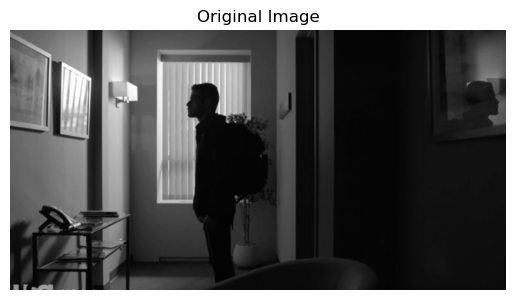

In [11]:
grayscale_dark = cv2.cvtColor(dark, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title("Original Image")
plt.imshow(grayscale_dark,cmap=plt.cm.gray)

<AxesSubplot: ylabel='Count'>

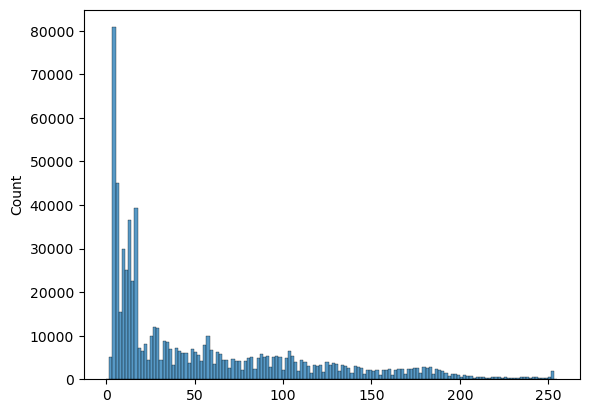

In [12]:
dark_plot=grayscale_dark.flatten()
sns.histplot(dark_plot)

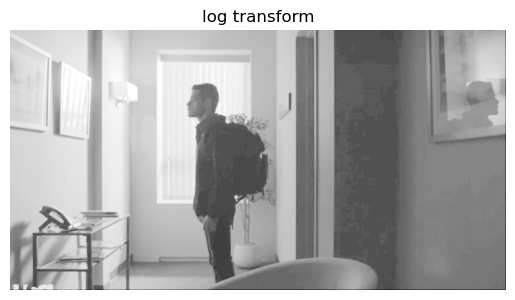

In [13]:
grayscale_dark_log=logTransformImage(grayscale_dark,255)
plt.axis('off')
plt.title("log transform")
plt.imshow(grayscale_dark_log,cmap=plt.cm.gray)

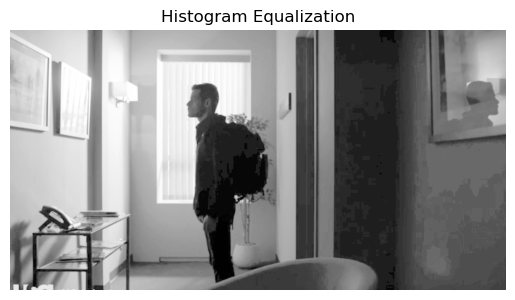

In [14]:
grayscale_dark_eq=histogram_equalization(grayscale_dark)
plt.axis('off')
plt.title("Histogram Equalization")
plt.imshow(grayscale_dark_eq,cmap=plt.cm.gray)

## Bright Image

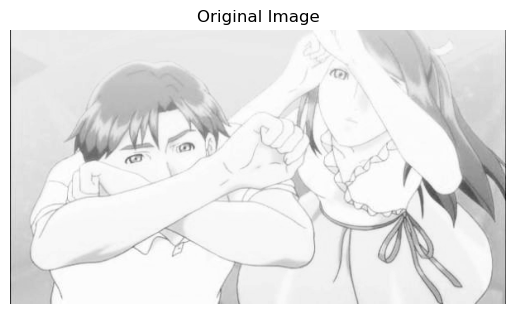

In [15]:
grayscale_bright = cv2.cvtColor(bright, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title("Original Image")
plt.imshow(grayscale_bright,cmap=plt.cm.gray)

<AxesSubplot: ylabel='Count'>

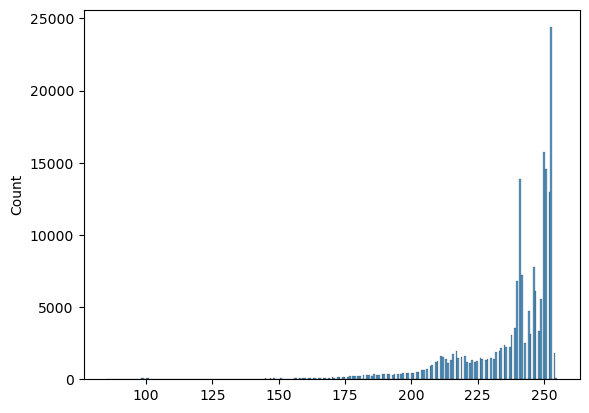

In [16]:
bright_plot=grayscale_bright.flatten()
sns.histplot(bright_plot)

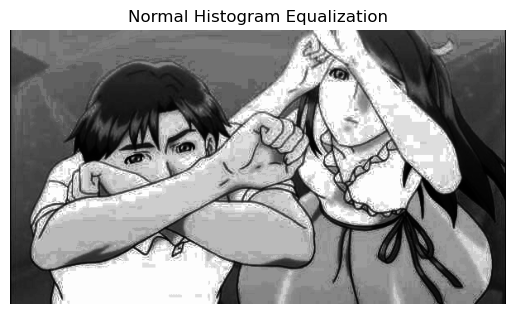

In [17]:
grayscale_bright_eq=histogram_equalization(grayscale_bright)
plt.axis('off')
plt.title('Normal Histogram Equalization')
plt.imshow(grayscale_bright_eq,cmap=plt.cm.gray)

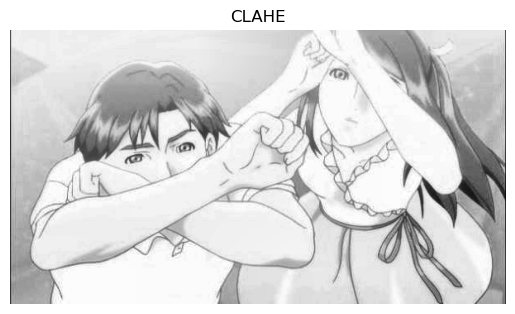

In [18]:
clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(4,4))
clahe_img_bright=clahe.apply(grayscale_bright)
plt.axis('off')
plt.title('CLAHE')
plt.imshow(clahe_img_bright,cmap=plt.cm.gray)

#### Clahe vs Normal Histogram Equalizaiton
In normal Histogram Equalization, the values among each set is distributed equally, but for the  adaptive histogram equalization (CLAHE), there is a certain clip limit as shown in the figure below
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/450px-Clahe-redist.svg.png'>

## Low Contrast
### Dark

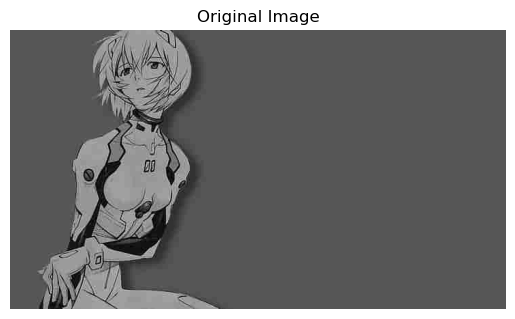

In [19]:
grayscale_low_contrast_dark = cv2.cvtColor(low_contrast_dark, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title("Original Image")
plt.imshow(grayscale_low_contrast_dark,cmap=plt.cm.gray)

<AxesSubplot: ylabel='Count'>

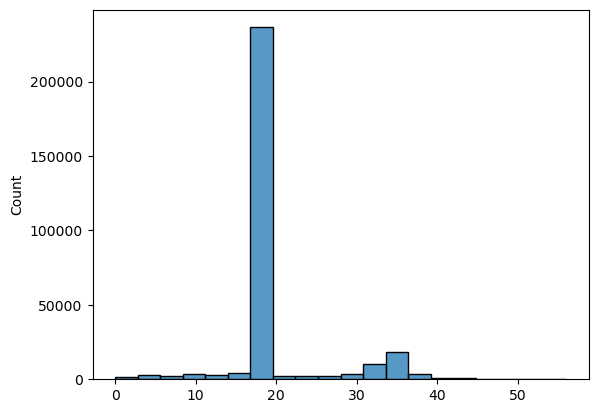

In [20]:
contrast_dark_plot=grayscale_low_contrast_dark.flatten()
sns.histplot(contrast_dark_plot)

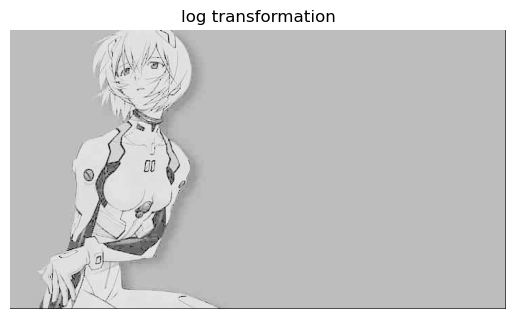

In [21]:
grayscale_low_contrast_dark_log=logTransformImage(grayscale_low_contrast_dark)
plt.axis('off')
plt.title('log transformation')
plt.imshow(grayscale_low_contrast_dark_log,cmap=plt.cm.gray)

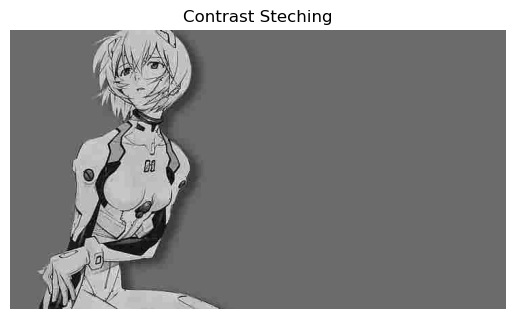

In [22]:
grayscale_low_contrast_dark_streched=contrast_stretching(grayscale_low_contrast_dark,0,45)
# the values for 0 and 45 as min and max values of the image is deducted from the histogram above
plt.axis('off')
plt.title('Contrast Steching')
plt.imshow(grayscale_low_contrast_dark_streched,cmap=plt.cm.gray)

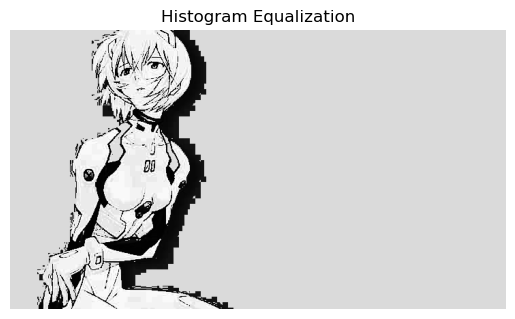

In [23]:
grayscale_low_contrast_dark_eq=histogram_equalization(grayscale_low_contrast_dark)
plt.axis('off')
plt.title('Histogram Equalization')
plt.imshow(grayscale_low_contrast_dark_eq,cmap=plt.cm.gray)

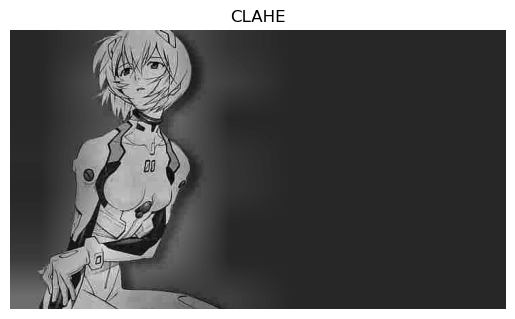

In [24]:
clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
clahe_img_low_dark=clahe.apply(grayscale_low_contrast_dark)
plt.axis('off')
plt.title('CLAHE')
plt.imshow(clahe_img_low_dark,cmap=plt.cm.gray)

### Bright

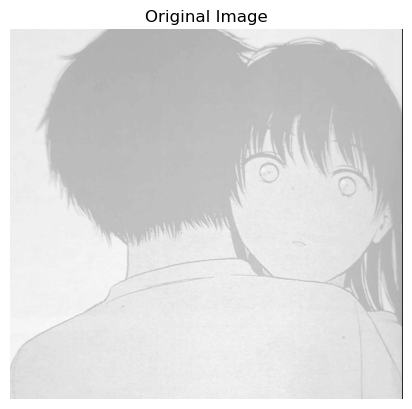

In [25]:
grayscale_low_contrast_bright = cv2.cvtColor(low_contrast_bright, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title("Original Image")
plt.imshow(grayscale_low_contrast_bright,cmap=plt.cm.gray)

<AxesSubplot: ylabel='Count'>

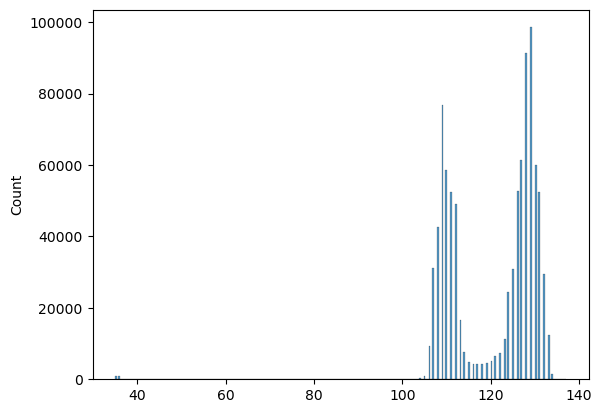

In [26]:
contrast_bright_plot=grayscale_low_contrast_bright.flatten()
sns.histplot(contrast_bright_plot)

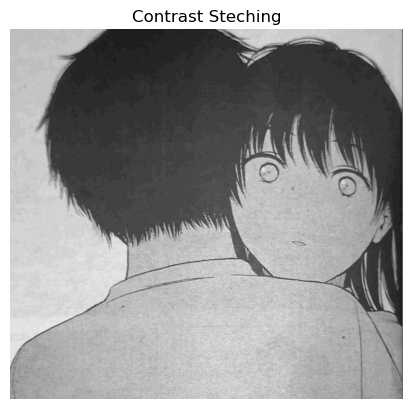

In [27]:
grayscale_low_contrast_bright_streched=contrast_stretching(grayscale_low_contrast_bright,100,140)
#it can be seen on the histogram that the image is centered around 100 and 140, even though the smallest may be 0
plt.axis('off')
plt.title('Contrast Steching')
plt.imshow(grayscale_low_contrast_bright_streched,cmap=plt.cm.gray)

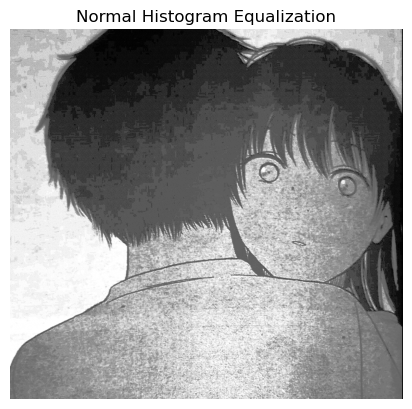

In [28]:
grayscale_low_contrast_bright_eq=histogram_equalization(grayscale_low_contrast_bright)
plt.axis('off')
plt.title('Normal Histogram Equalization')
plt.imshow(grayscale_low_contrast_bright_eq,cmap=plt.cm.gray)

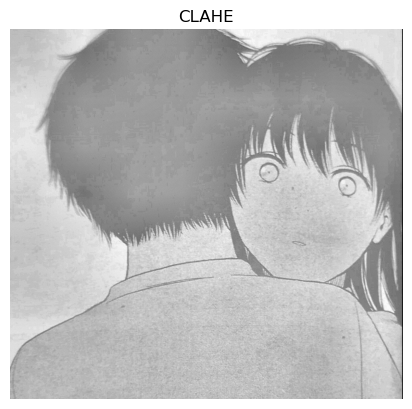

In [29]:
clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
clahe_img_low_bright=clahe.apply(grayscale_low_contrast_bright)
plt.axis('off')
plt.title('CLAHE')
plt.imshow(clahe_img_low_bright,cmap=plt.cm.gray)

[Text(0.5, 1.0, 'CLAHE')]

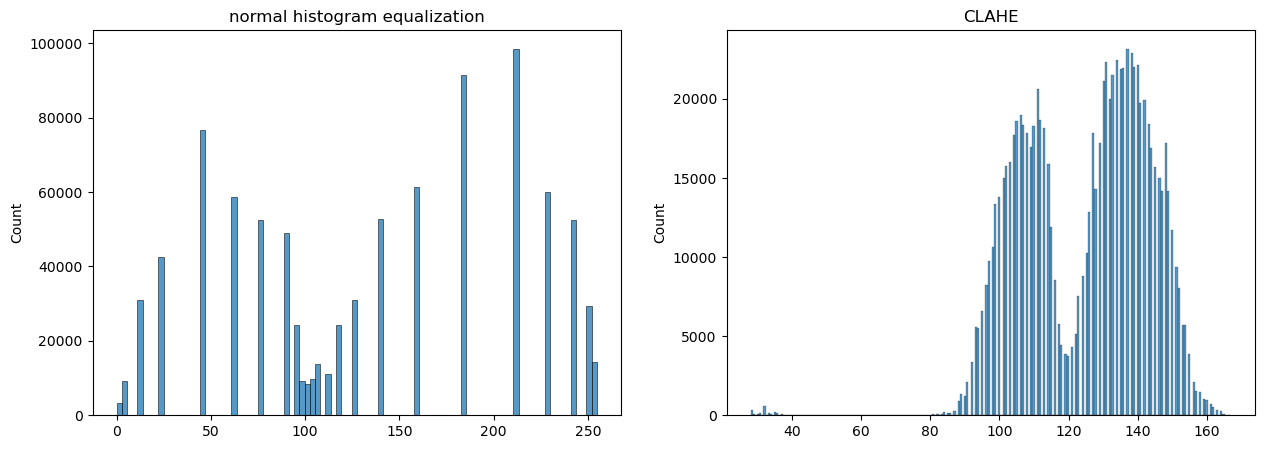

In [30]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
grayscale_low_contrast_bright_eq_plot=(np.array(grayscale_low_contrast_bright_eq)).flatten()
clahe_img_low_bright_plot=np.array(clahe_img_low_bright).flatten()
sns.histplot(grayscale_low_contrast_bright_eq_plot,ax=ax[0])
ax[0].set(title='normal histogram equalization')
sns.histplot(clahe_img_low_bright_plot,ax=ax[1])
ax[1].set(title='CLAHE')

As shown in the graph above, the distribution is still kept by using CLAHE and it produces less noisy image. Although this is the case, contrast streching would be the most beneficiial as it can be set to which thershold the minimum and maximum value of the image, by not taking into account the outliers as shown in the histogram of the original data, the lowest value is 0 but it is considered as an outlier. This would also apply to the previous lower contrast image 

## Sharp Image

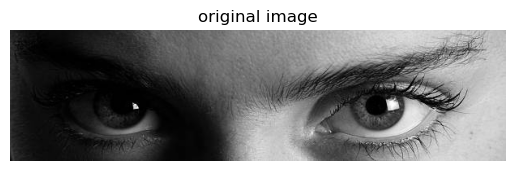

In [31]:
grayscale_sharp = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("original image")
plt.imshow(grayscale_sharp,cmap=plt.cm.gray)

In [32]:
kernel_sharp=gaussian_kernel(7,3)
grayscale_sharp_conv=convolve2D(grayscale_sharp, kernel_sharp,7)

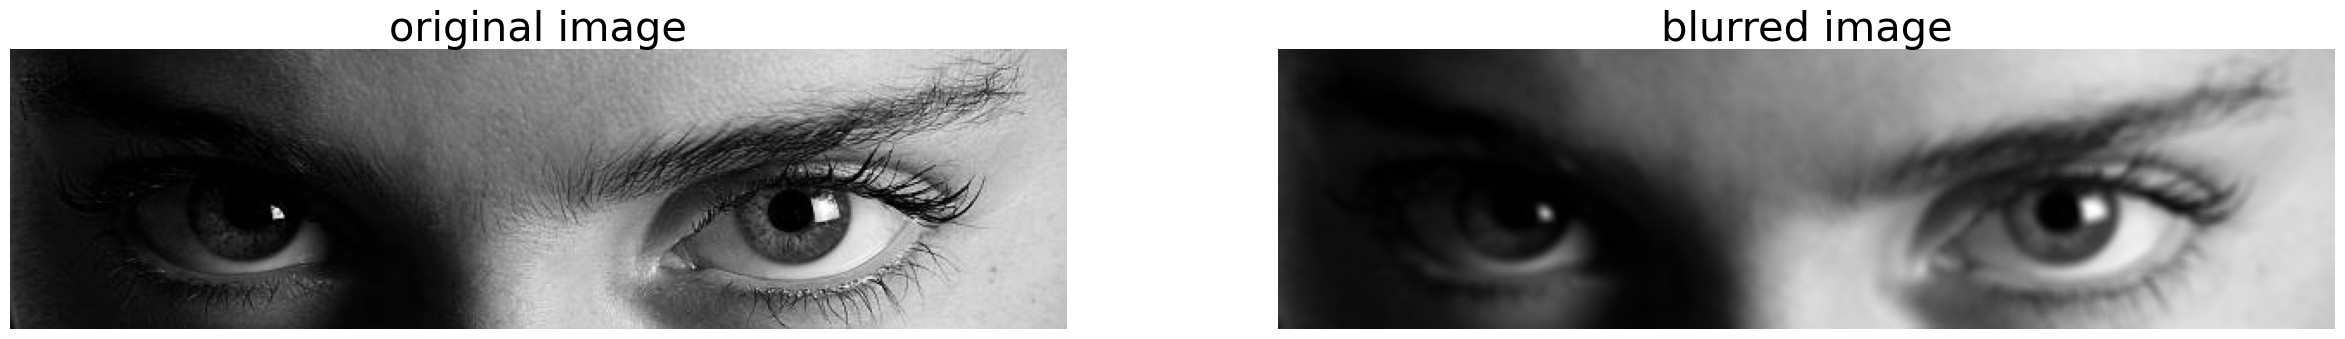

In [33]:
fig,ax=plt.subplots(1,2,figsize=(30,10))
ax[0].axis("off")
ax[0].set_title("original image",size=30)
ax[1].axis("off")
ax[1].set_title("blurred image",size=30)
ax[0].imshow(grayscale_sharp,cmap=plt.cm.gray)
ax[1].imshow(grayscale_sharp_conv,cmap=plt.cm.gray)

It can be seen that when an image is too sharp, it can be blurred to attain only the general notion of the image. For example, in the image above the blurred picture of eyes can be used for easier segmentation of the eyebrows part as it doesn't have any detail that could clutter the segmentation result

## Blur Image

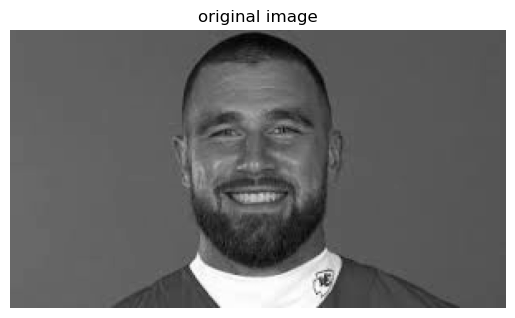

In [34]:
grayscale_blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("original image")
plt.imshow(grayscale_blur,cmap=plt.cm.gray)

In [35]:
kernel_blur=gaussian_kernel(5,1)
grayscale_blur_conv=convolve2D(grayscale_blur, kernel_blur,5)
detail=grayscale_blur-grayscale_blur_conv
detailed_grayscale_blur=grayscale_blur+0.5*detail

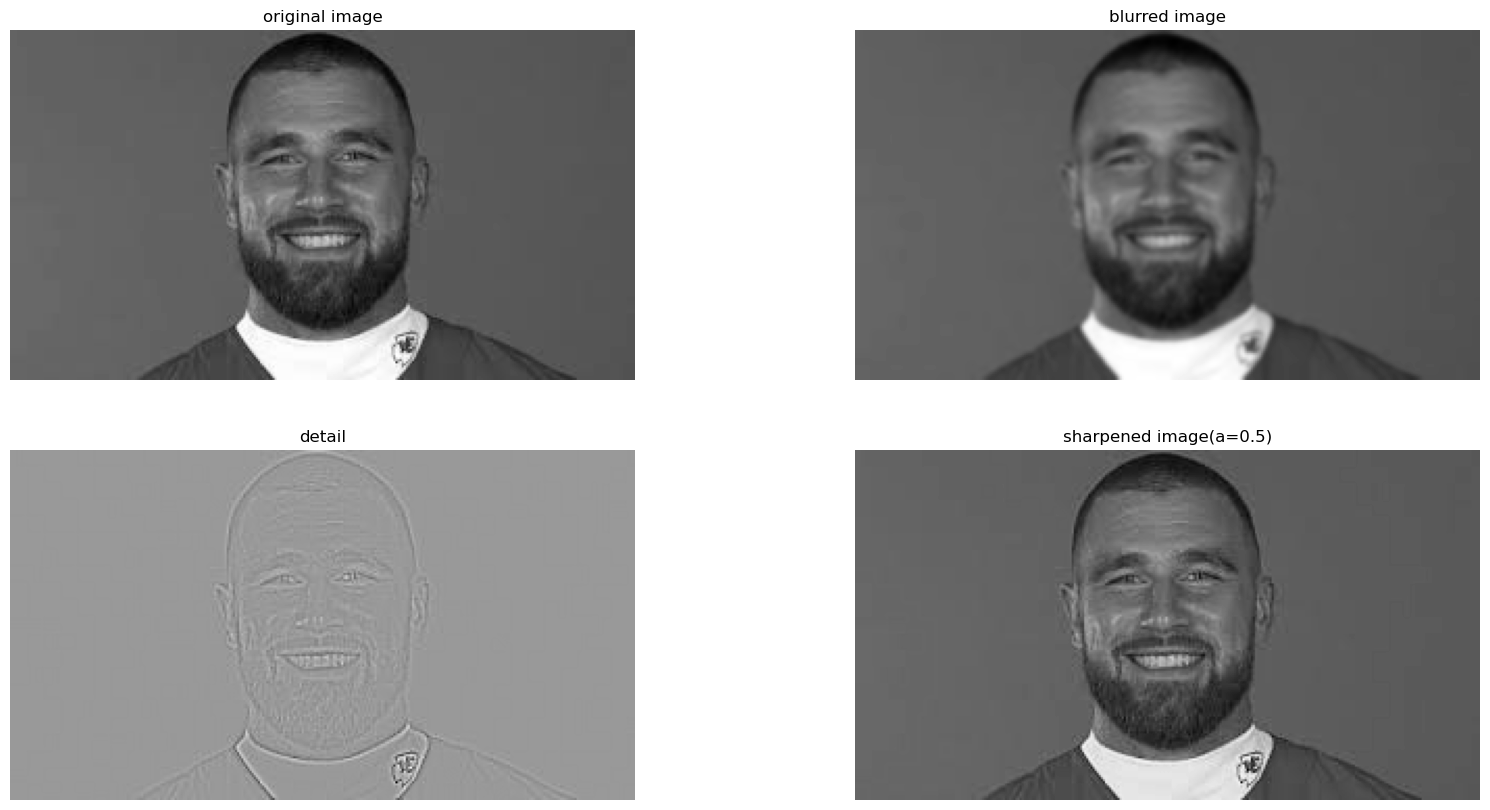

In [36]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0][0].axis("off")
ax[0][0].set_title("original image")
ax[0][1].axis("off")
ax[0][1].set_title("blurred image")
ax[1][1].axis("off")
ax[1][0].set_title("detail")
ax[1][0].axis("off")
ax[1][1].set_title("sharpened image(a=0.5)")
ax[0][0].imshow(grayscale_blur,cmap=plt.cm.gray)
ax[0][1].imshow(grayscale_blur_conv,cmap=plt.cm.gray)
ax[1][0].imshow(detail,cmap=plt.cm.gray)
ax[1][1].imshow(detailed_grayscale_blur,cmap=plt.cm.gray)

By extracting the detail from the blurred picture, it can be used to sharpened the original image by adding it to a certain degree using the formula of 

Shaprened image= F + alpha(F - h * F) where F is the original image and h is the kernel being used to blur the image

<img src='https://ai.stanford.edu/~syyeung/cvweb/Pictures1/sharpening2.png'>

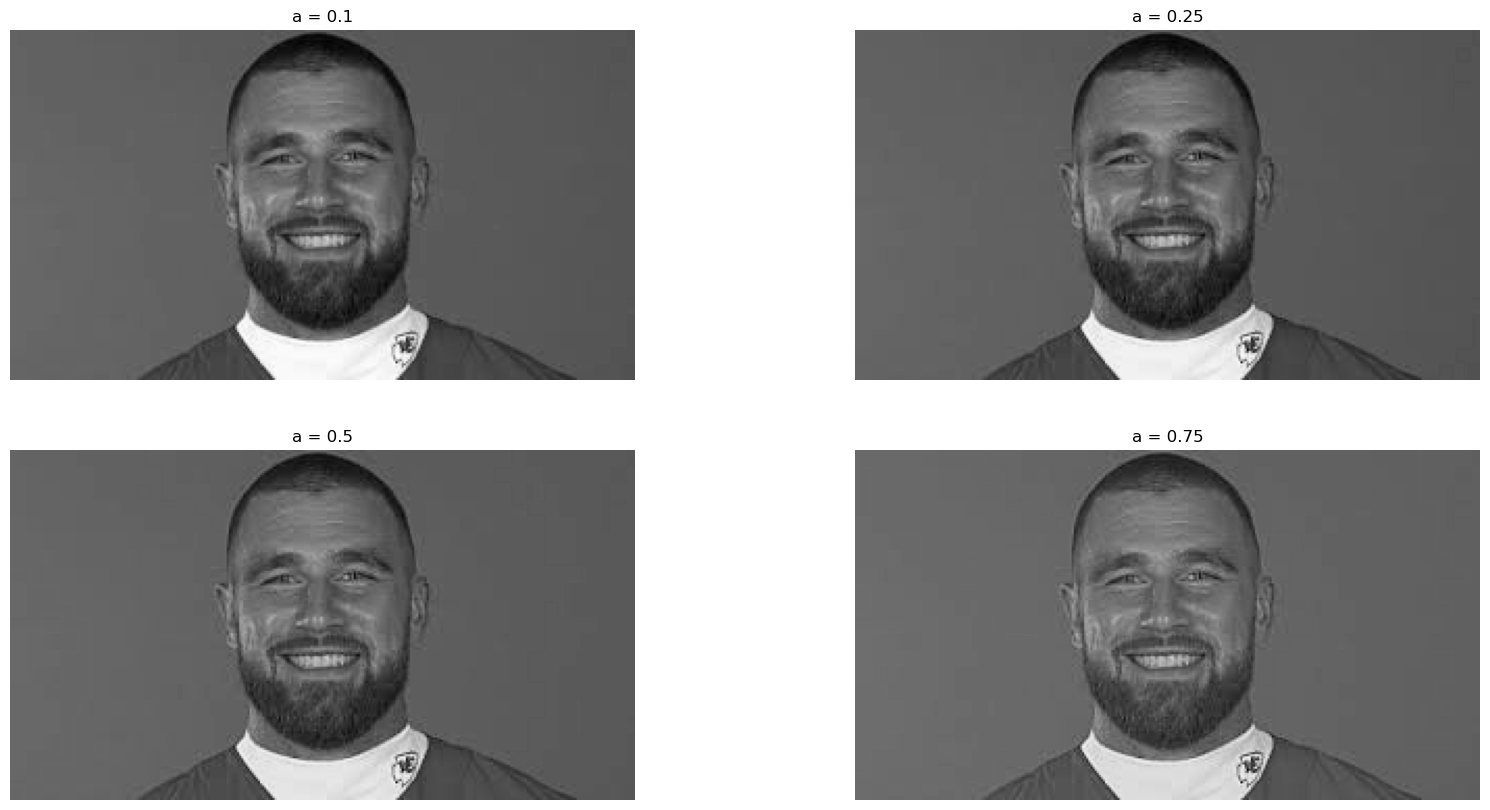

In [37]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0][0].axis("off")
ax[0][0].set_title("a = 0.1")
ax[0][1].axis("off")
ax[0][1].set_title("a = 0.25")
ax[1][1].axis("off")
ax[1][0].set_title("a = 0.5")
ax[1][0].axis("off")
ax[1][1].set_title("a = 0.75")
ax[0][0].imshow(grayscale_blur+0.1*detail,cmap=plt.cm.gray)
ax[0][1].imshow(grayscale_blur+0.25*detail,cmap=plt.cm.gray)
ax[1][0].imshow(grayscale_blur+0.5*detail,cmap=plt.cm.gray)
ax[1][1].imshow(grayscale_blur+0.75*detail,cmap=plt.cm.gray)

The bigger the coefficient it has, the more detail it would have, for example in the alpha of 0.75 it can be seen the forehead lines and the beard is more refined and it also applies to the eyebrows.

## Noisy image

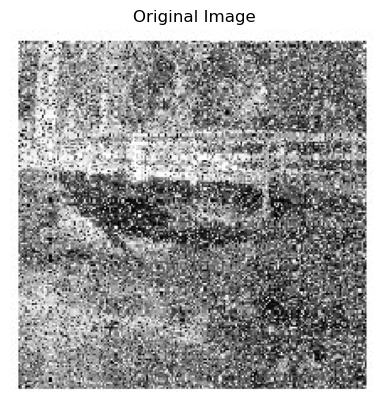

In [38]:
grayscale_noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("Original Image")
plt.imshow(grayscale_noisy,cmap=plt.cm.gray)

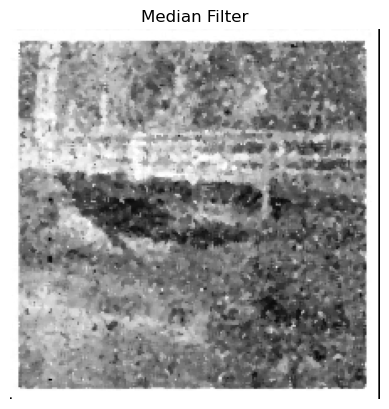

In [39]:
grayscale_noisy_median=median_filter(grayscale_noisy,3)
plt.axis("off")
plt.title("Median Filter")
plt.imshow(grayscale_noisy_median,cmap=plt.cm.gray)

By using median filter, we can clear out the noise of the image but it would also need an additional steps of sharpening after removing the noise as the image would still be blurred
<br>
### Process of median filter
<img src='https://www.researchgate.net/publication/276304662/figure/fig1/AS:585524309946368@1516611282138/Example-of-Median-Filtering-using-a-33-sampling-window-keeping-border-values-unchanged.png'>

# Conclusion
Analyzing and enhancing images of different types can be tricky. Different types of process can be utilized for the same images. Each images has its own characteristics and would be used for different purposes. Images that are low on brightness but has a certain amount of contrasts on values can be enhanced by either logarithmic transform or normal histogram equalization. But on the other hand, images that are unique in a certain way can be ehanced by applying contrast limited adaptive histogram equalization so that it doesn't produce noise. As for images that are low on contrast are best to be applied on contrast streching as CLAHE still produes noise after processing. 
<br>
<br>
On some other occassions, if we want to segment an image but it is overly sharp, blurring using the gaussian kernel and convolution method can be beneficial. Not only that, the image can also be sharpened by extracting the detail through gaussian convolution and putting it back into the original image by applying a factor to it. Using the block movement, a noisy image can also be enhanced, either it utilized the mean or the median. But for images that has outliers it is best to use the median on the filtering process. This would conclude enhancement process and analysis on six different images.

© Louis Widi Anandaputra - September 2023